In [1]:
import dicom, lmdb, cv2, re, sys, caffe
import os, fnmatch, shutil, subprocess
from IPython.utils import io
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # we ignore a RuntimeWarning produced from dividing by zero

In [3]:
caffe.set_mode_gpu()
net = caffe.Net('fcn_deploy.prototxt', './model_logs/fcn_iter_15000.caffemodel', caffe.TEST)

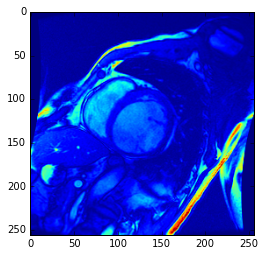

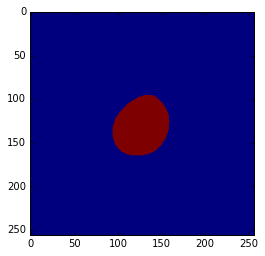

In [40]:
img_path = "/home/zijia/HeartDeepLearning/DATA/challenge_online/SC-HF-I-10/IM-0024-0040.dcm"
img = dicom.read_file(img_path)
img = img.pixel_array
plt.imshow(img)
plt.show()

label_path = '/home/zijia/HeartDeepLearning/DATA/OnlineDataContours/SC-HF-I-10/contours-manual/IRCCI-expert/IM-0001-0040-icontour-manual.txt'

ctrs = np.loadtxt(label_path, delimiter=' ').astype(np.int)
label = np.zeros_like(img, dtype="uint8")
cv2.fillPoly(label, [ctrs], 1)
plt.imshow(label)
plt.show()

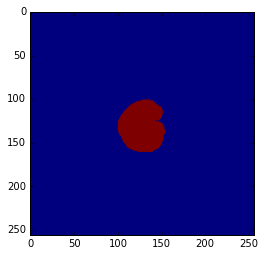

5038


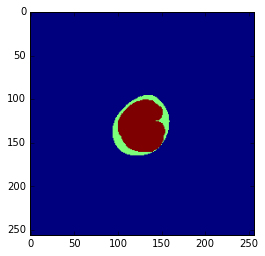

5963
<type 'float'>
0.844876739896


In [41]:
img = dicom.read_file(img_path).pixel_array
assert img.shape == (256,256), 'img shape error'
MEAN_VALUE = 77
THRESH = 0.5
in_ = np.expand_dims(img, axis=0)
in_ -= np.array([MEAN_VALUE])
net.blobs['data'].reshape(1, *in_.shape)
net.blobs['data'].data[...] = in_
net.forward()
prob = net.blobs['prob'].data
obj = prob[0][1]
plt.imshow(obj)
preds = np.where(obj > THRESH, 1, 0)
plt.imshow(preds)
plt.show()


iou = 2*np.sum(preds*label)
print iou
s = preds+label
plt.imshow(s)
plt.show()
print np.sum(s)
iou  = float(iou)/float(np.sum(preds+label))
print type(iou)
print iou